In [28]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import holidays
import datetime
%matplotlib inline

In [ ]:
!pwd; ls -ll;

2 Cells below is relevant only when activating on cloud / Linux machine.
Since on Windows  google.colab not working


from google.colab import files
uploaded = files.upload()

import io
DataFrame = pd.read_csv(io.BytesIO(uploaded['Crimes_-_2020.csv']))
DataFrame

Update csv data bease:
https://drive.google.com/file/d/1s5lavM_C9aLsgdFzUmXOfbh_XvSxl-G4/view?usp=sharing

In [3]:
DataFrame = pd.read_csv("Crimes_-_2019_to_Present.csv")

In [19]:
Sunrise = pd.read_csv('sunrise-chicago.csv')

# Add converted columns
Sunrise['dtsunset']=Sunrise.apply(lambda x: datetime.datetime.combine(pd.to_datetime(x['date']), pd.to_datetime(x['sunset']).time()), axis=1)
Sunrise['dtsunrise']=Sunrise.apply(lambda x: datetime.datetime.combine(pd.to_datetime(x['date']), pd.to_datetime(x['sunrise']).time()), axis=1)

# a constant defining the time between sunset and darkness
delta_sunset = datetime.timedelta(0,3600)
#TODO: check exact delta, set another constant for sunrise time

# Accepts datetime in string, returns boolean if it's in night time
def is_dark(datecol) :
  d = pd.to_datetime(datecol)
  row = Sunrise.loc[Sunrise['date']==d.strftime("%Y-%m-%d")]
  return d < row['dtsunrise'].item() or d > (row['dtsunset'].item() + delta_sunset)

# Add IsDark colunm to DataFrame
# for tests, uncomment the next line and comment the line after it
#DataFrame = DataFrame.head()
DataFrame['IsDark']=DataFrame.apply(lambda x: is_dark(x['Date']) ,axis=1)


Based on link below, we shall use FBI code instead of IUCR .
http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html#N04A
For example :

> **FBI code** - Homicide 1st & 2nd Degree - 01A

> **IUCR** 
*  0110 HOMICIDE FIRST DEGREE MURDER
*  0130 HOMICIDE SECOND DEGREE MURDER

> **FBI code** - Nonvoluntary Manslaughter - 01B

> **IUCR** 
*    0141 HOMICIDE INVOLUNTARY MANSLAUGHTER
*    0142 HOMICIDE RECKLESS HOMICIDE

In [4]:
DataFrame.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

**dt0 - Seasons numeric**

*   4- Fall   - Lowest crime rate
*   3- Summer - Highest crime rate

*   2- Spring
*   1- Winter

**dt1 - Weekday numeric**
 The day of the week with Monday=0, Sunday=6 
 
**dt2 - Weekday string** 

*  Sunday - Highest rate crimes
*  Tuesday - Lowest rate crimes


   
    


In [31]:
for date in holidays.UnitedStates(years=2020).items():print(str(date[0]))

2020-01-01
2020-01-20
2020-02-17
2020-05-25
2020-07-04
2020-07-03
2020-09-07
2020-10-12
2020-11-11
2020-11-26
2020-12-25


In [37]:
us_holidays = []
for date in holidays.UnitedStates(years=2020).items():
    us_holidays.append(str(date[0]))
print(us_holidays)

['2020-01-01', '2020-01-20', '2020-02-17', '2020-05-25', '2020-07-04', '2020-07-03', '2020-09-07', '2020-10-12', '2020-11-11', '2020-11-26', '2020-12-25']


In [59]:
dt0 = DataFrame.copy()
del dt0['ID']
##del dt0['Year']
del dt0['Case Number']
del dt0['Updated On']
dt0["Arrest"] = dt0["Arrest"].astype(int)
dt0["Domestic"] = dt0["Domestic"].astype(int)
dt0["FBI Code"] = (DataFrame["FBI Code"]).apply(lambda x: int(x, 16))
dt0["Season"] = (pd.to_datetime(dt0['Date'], format="%m/%d/%Y %I:%M:%S %p").dt.month%12 + 3)//3
dt0["Weekday"] = pd.to_datetime(dt0['Date'], format="%m/%d/%Y %I:%M:%S %p").dt.dayofweek
dt0["Just_Date"] = (pd.to_datetime(dt0['Date'])).dt.date
dt0["Is_Holiday"] = [ 1 if str(val).split()[0] in us_holidays else 0 for val in dt0["Just_Date"]]
dt0["Day_of_Month"] = pd.to_datetime(dt0["Just_Date"]).dt.day
dt0["Month"] = pd.to_datetime(dt0["Just_Date"]).dt.month
#dt0["Day_of_Month"] = pd.to_datetime(dt0['Just_Date']).dt.day.values
##dt0["just_date"] = dt0['Date'].dt.date
##  dt0["Date"] = (pd.to_datetime(dt0['Date'], format="%m/%d/%Y %I:%M:%S %p").dt.month%12 + 3)//3
## dt0["Date"].value_counts()
dt0.columns

Index(['Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Latitude', 'Longitude', 'Location', 'Season', 'Weekday', 'Just_Date',
       'Is_Holiday', 'Day_of_Month', 'Month'],
      dtype='object')

In [61]:
dt0

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Y Coordinate,Latitude,Longitude,Location,Season,Weekday,Just_Date,Is_Holiday,Day_of_Month,Month
0,09/06/2020 04:30:00 AM,122XX S ADA ST,051A,ASSAULT,AGGRAVATED - HANDGUN,VEHICLE NON-COMMERCIAL,0,0,524,5,...,1823602.0,41.671462,-87.655101,"(41.671461741, -87.65510074)",4,6,2020-09-06,0,6,9
1,09/06/2020 03:30:00 PM,036XX W DIVERSEY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,0,0,2524,25,...,1918368.0,41.931886,-87.718974,"(41.931885873, -87.718974049)",4,6,2020-09-06,0,6,9
2,09/06/2020 08:11:00 PM,034XX N NATOMA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,0,1,1632,16,...,1922126.0,41.942567,-87.792209,"(41.942567168, -87.792208683)",4,6,2020-09-06,0,6,9
3,09/06/2020 12:00:00 AM,047XX N WINTHROP AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,0,0,1914,19,...,1931673.0,41.968053,-87.657619,"(41.968052927, -87.657619242)",4,6,2020-09-06,0,6,9
4,09/06/2020 04:30:00 PM,071XX S WESTERN AVE,0560,ASSAULT,SIMPLE,DRUG STORE,0,0,832,8,...,1857318.0,41.764152,-87.683229,"(41.764151886, -87.683229302)",4,6,2020-09-06,0,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143114,01/01/2020 01:24:00 AM,062XX S WHIPPLE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,823,8,...,1863026.0,41.779907,-87.699510,"(41.779907312, -87.699510196)",1,2,2020-01-01,1,1,1
143115,01/01/2020 03:00:00 AM,002XX N PINE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,1523,15,...,1901141.0,41.884840,-87.763346,"(41.884839745, -87.763346491)",1,2,2020-01-01,1,1,1
143116,01/01/2020 02:13:00 PM,054XX N SHERIDAN RD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,0,2023,20,...,1936265.0,41.980639,-87.655103,"(41.980639456, -87.65510293)",1,2,2020-01-01,1,1,1
143117,01/01/2020 04:07:00 AM,068XX S PERRY AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,722,7,...,1859630.0,41.770173,-87.628291,"(41.770172698, -87.628291299)",1,2,2020-01-01,1,1,1


In [47]:
import requests
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="My_geolocate")

lookingFor = "Chicago"
locations = geolocator.geocode(lookingFor)
type(locations)



##print(locations)
##r = requests.get('https://api.sunrise-sunset.org/json', params={'lat': dt0[Latitude], 'lng': dt0[Longitude]}).json()['results']
##r = requests.get('https://api.sunrise-sunset.org/json', params={'lat': locations.latitude, 'lng': locations.longitude}).json()['results']
##print('Sunrise:', r['sunrise'])
##print('Sunset:', r['sunset'])

geopy.location.Location

In [ ]:
from heliacal import Heliacal
Chicago = Heliacal(dt0[Latitude], dt0[Longitude])

In [6]:
dt1 = DataFrame.copy()
dt1["Arrest"] = dt1["Arrest"].astype(int)
dt1["Domestic"] = dt1["Domestic"].astype(int)
dt1["FBI Code"] = (DataFrame["FBI Code"]).apply(lambda x: int(x, 16))
dt1["Date"] = pd.to_datetime(dt1['Date'], format="%m/%d/%Y %I:%M:%S %p").dt.dayofweek
dt1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12157684,JD358233,6,122XX S ADA ST,051A,ASSAULT,AGGRAVATED - HANDGUN,VEHICLE NON-COMMERCIAL,0,0,...,34.0,53,74,1169548.0,1823602.0,2020,09/13/2020 03:48:11 PM,41.671462,-87.655101,"(41.671461741, -87.65510074)"
1,12158021,JD358730,6,036XX W DIVERSEY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,0,0,...,35.0,22,20,1151419.0,1918368.0,2020,09/13/2020 03:48:11 PM,41.931886,-87.718974,"(41.931885873, -87.718974049)"
2,12158278,JD358923,6,034XX N NATOMA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,0,1,...,38.0,17,139,1131467.0,1922126.0,2020,09/13/2020 03:48:11 PM,41.942567,-87.792209,"(41.942567168, -87.792208683)"
3,12158889,JD359283,6,047XX N WINTHROP AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,0,0,...,46.0,3,20,1168010.0,1931673.0,2020,09/13/2020 03:48:11 PM,41.968053,-87.657619,"(41.968052927, -87.657619242)"
4,12159507,JD358752,6,071XX S WESTERN AVE,0560,ASSAULT,SIMPLE,DRUG STORE,0,0,...,18.0,66,138,1161608.0,1857318.0,2020,09/13/2020 03:48:11 PM,41.764152,-87.683229,"(41.764151886, -87.683229302)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143114,11940534,JD100083,2,062XX S WHIPPLE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,...,16.0,66,139,1157124.0,1863026.0,2020,01/08/2020 03:49:48 PM,41.779907,-87.699510,"(41.779907312, -87.699510196)"
143115,11938186,JD100178,2,002XX N PINE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,...,37.0,25,139,1139459.0,1901141.0,2020,01/08/2020 03:49:48 PM,41.884840,-87.763346,"(41.884839745, -87.763346491)"
143116,11938654,JD100726,2,054XX N SHERIDAN RD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,0,...,48.0,77,139,1168658.0,1936265.0,2020,01/08/2020 03:49:48 PM,41.980639,-87.655103,"(41.980639456, -87.65510293)"
143117,11938353,JD100252,2,068XX S PERRY AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,...,6.0,69,139,1176578.0,1859630.0,2020,01/08/2020 03:49:48 PM,41.770173,-87.628291,"(41.770172698, -87.628291299)"


In [62]:
dt0["Month"].value_counts()

1    19605
8    19181
7    19142
2    17939
6    17322
5    17319
3    16489
4    12697
9     3425
Name: Month, dtype: int64

Should we  remove rows related to 6 days at the beginning of September?

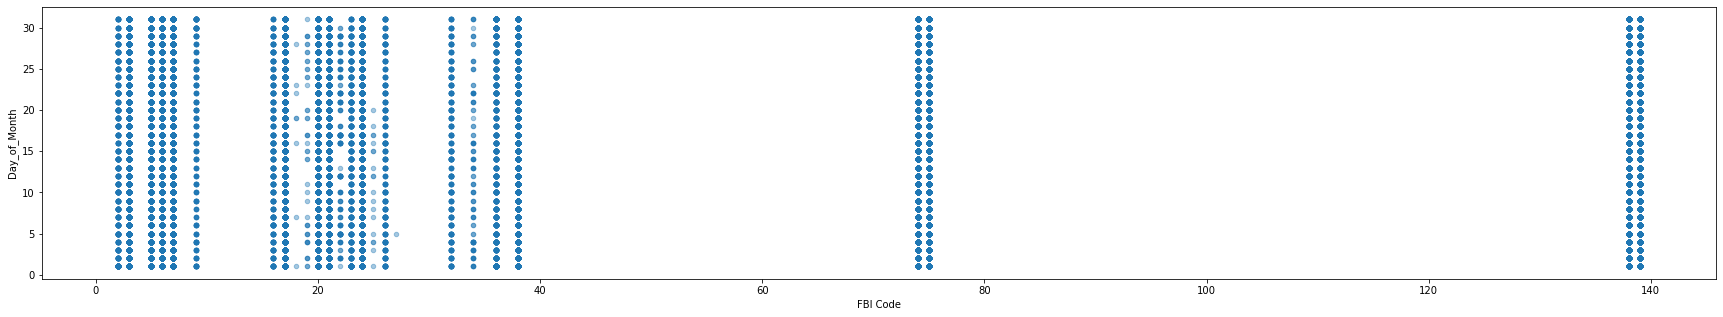

In [73]:
x=np.c_[dt0["FBI Code"]]
y=np.c_[dt0["Day_of_Month"]]
dt0.plot(kind='scatter', x="FBI Code", y='Day_of_Month', alpha=(0.4),figsize=(30,5))
plt.show()

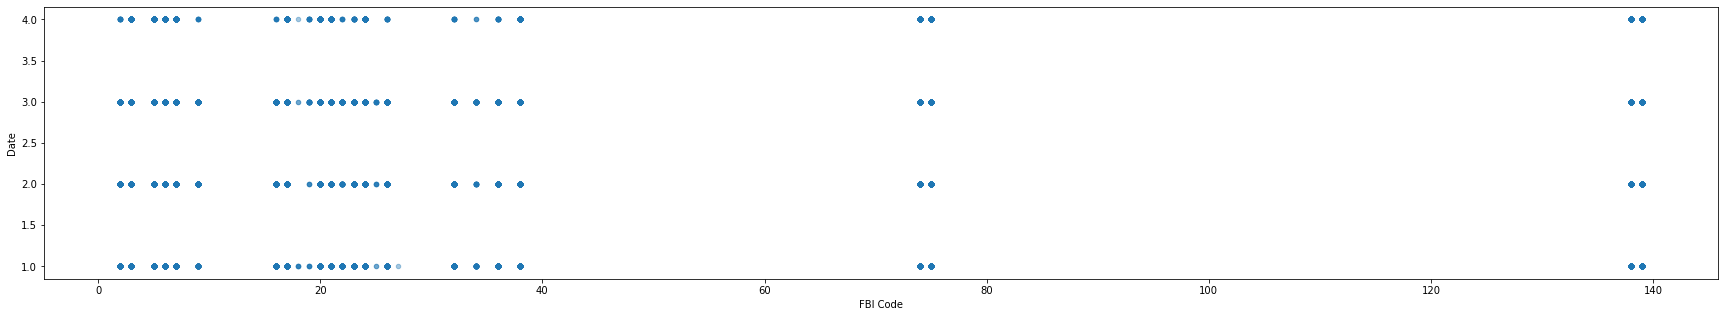

In [13]:
x=np.c_[dt0["FBI Code"]]
y=np.c_[dt0["Date"]]
dt0.plot(kind='scatter', x="FBI Code", y='Date', alpha=(0.4),figsize=(30,5))
plt.show()

In [ ]:
codt1=dt1[dt1["Date"]==6]
codt1.head(3)

In [ ]:
codt1.plot(kind='scatter',x="X Coordinate", y="Y Coordinate", alpha=(0.4),figsize=(20,20),c="Date", cmap=plt.get_cmap("Blues"), colorbar=True, sharex=False)
plt.legend()

In [ ]:
dt2 = DataFrame.copy()
dt2['Date'] = pd.to_datetime(dt2['Date'], format="%m/%d/%Y %I:%M:%S %p").dt.day_name()
dt2

In [ ]:
dt2["Date"].value_counts()

In [ ]:
DataFrame.shape[0]

In [ ]:
DataFrame.shape[1]

In [ ]:
DataFrame["Community Area"].value_counts()

Community Area no. 25 appears 8722 time in the data set

In [ ]:
co=DataFrame[DataFrame["Community Area"]==25]
co.head(3)

"Block" crimes distribution on "Community Area" no.25 It is seen that the top 3 streets with crime:

    052XX W MADISON ST(72) & 056XX W MADISON ST(49) & 048XX W MADISON ST(47)
    001XX N CENTRAL AVE(63) & 003XX N CENTRAL AVE(58)
    003XX S CICERO AVE(60) & 007XX S CICERO AVE(50)



In [ ]:
co["Block"].value_counts().head(10)

"Primary Type" crimes distribution on "Community Area" no.25. It is seen that the top 4 crimes:

    Battery
    Theft
    Criminal Damage
    Assualt



In [ ]:
co["Primary Type"].value_counts()

In [ ]:
DataFrame.Description.value_counts()

In [ ]:
DataFrame["Location Description"].value_counts()

In [ ]:
DataFrame.sort_values(by=["Location Description", "Primary Type"])

In [ ]:
DataFrame[(DataFrame["Primary Type"]=="ASSAULT")&(DataFrame["Location Description"]=="STREET")]

In [ ]:
DataFrame.plot(kind='scatter',x="X Coordinate", y="Y Coordinate", alpha=(0.4),figsize=(50,50),c="Community Area", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

In [ ]:
co.plot(kind='scatter',x="X Coordinate", y="Y Coordinate", alpha=(0.4),figsize=(10,10),c="Community Area", cmap=plt.get_cmap("Blues"), colorbar=True, sharex=False)
plt.legend()

Plot histogram that shows per district the number of total crimes.
Next step would be to create a testing data frame , from 20% of the dataset.
Need to make sure that it would resemble  the distribution of all DataSet

29/10/20 START

In [75]:
dt0.describe()

,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Season,Weekday,Is_Holiday,Day_of_Month,Month
count,143119.000000,143119.000000,143119.000000,143119.000000,143112.000000,143119.000000,143119.000000,1.421070e+05,1.421070e+05,142107.000000,142107.000000,143119.000000,143119.000000,143119.000000,143119.000000,143119.000000
mean,0.162885,0.191554,1138.744786,11.157987,22.873057,37.522300,49.443002,1.164951e+06,1.885002e+06,41.840033,-87.670239,2.174337,3.052369,0.028564,15.480572,4.643213
std,0.369262,0.393525,693.081222,6.925710,13.712779,21.462436,53.604889,1.623080e+04,3.169479e+04,0.087168,0.059058,0.846443,2.012691,0.166577,9.085410,2.446887
min,0.000000,0.000000,111.000000,1.000000,1.000000,1.000000,2.000000,1.092647e+06,1.813897e+06,41.644590,-87.934567,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,612.000000,6.000000,9.750000,23.000000,6.000000,1.152945e+06,1.857903e+06,41.765356,-87.713774,1.000000,1.000000,0.000000,7.000000,2.000000
50%,0.000000,0.000000,1022.000000,10.000000,23.000000,32.000000,20.000000,1.166546e+06,1.890278e+06,41.854705,-87.664380,2.000000,3.000000,0.000000,15.000000,5.000000
75%,0.000000,0.000000,1711.000000,17.000000,34.000000,56.000000,75.000000,1.176667e+06,1.908088e+06,41.903479,-87.627443,3.000000,5.000000,0.000000,23.000000,7.000000
max,1.000000,1.000000,2535.000000,31.000000,50.000000,77.000000,139.000000,1.205112e+06,1.951527e+06,42.022586,-87.524618,4.000000,6.000000,1.000000,31.000000,9.000000


In [77]:
corrMatrix= dt0.corr()
corrMatrix["FBI Code"].sort_values(ascending=True)

Y Coordinate     -0.068472
Latitude         -0.068331
Ward             -0.053878
Beat             -0.044275
District         -0.044229
Day_of_Month     -0.006250
Longitude        -0.000282
X Coordinate      0.000816
Is_Holiday        0.011048
Arrest            0.016502
Month             0.017234
Weekday           0.017811
Season            0.024214
Community Area    0.068955
Domestic          0.449185
FBI Code          1.000000
Name: FBI Code, dtype: float64

29/10/20 What is the most common crime  (6 is the most common crime which is theft)

In [95]:
dt0["Community Area"].value_counts()

25    8722
43    5353
8     5118
29    4861
23    4573
      ... 
55     331
12     326
74     291
47     225
9      144
Name: Community Area, Length: 77, dtype: int64

In [78]:
dt0["FBI Code"].value_counts()

6      28603
139    24164
20     17358
138    10735
38      9723
17      8254
5       6378
7       6311
75      5750
21      5558
3       5181
24      4897
74      4278
36      1544
23       958
2        920
16       686
26       533
32       495
9        387
22       222
34       110
19        46
25        19
18         8
27         1
Name: FBI Code, dtype: int64

In [79]:
for6=dt0[dt0["FBI Code"]==6]
for6

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Y Coordinate,Latitude,Longitude,Location,Season,Weekday,Just_Date,Is_Holiday,Day_of_Month,Month
9,09/06/2020 08:00:00 PM,002XX W MADISON ST,0820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),0,0,122,1,...,1900346.0,41.881944,-87.634195,"(41.881944424, -87.634195294)",4,6,2020-09-06,0,6,9
11,09/06/2020 08:30:00 PM,002XX E 100TH ST,0820,THEFT,$500 AND UNDER,RESIDENCE - YARD (FRONT / BACK),0,0,511,5,...,1838723.0,41.712729,-87.617196,"(41.712728832, -87.617195602)",4,6,2020-09-06,0,6,9
18,09/06/2020 12:00:00 AM,066XX S ROCKWELL ST,0810,THEFT,OVER $500,STREET,0,0,831,8,...,1860504.0,41.772924,-87.688361,"(41.772924147, -87.688361073)",4,6,2020-09-06,0,6,9
30,09/06/2020 12:10:00 AM,012XX W 18TH ST,0820,THEFT,$500 AND UNDER,BAR OR TAVERN,0,0,1233,12,...,1891548.0,41.857939,-87.657300,"(41.857938856, -87.657300344)",4,6,2020-09-06,0,6,9
37,09/06/2020 01:30:00 AM,013XX W MORSE AVE,0820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),0,0,2431,24,...,1946191.0,42.007934,-87.664534,"(42.007933629, -87.664534142)",4,6,2020-09-06,0,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143076,01/01/2020 12:59:00 PM,0000X S STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,1,0,112,1,...,1900278.0,41.881718,-87.627760,"(41.88171846, -87.627760426)",1,2,2020-01-01,1,1,1
143080,01/01/2020 01:00:00 AM,035XX N CLARK ST,0810,THEFT,OVER $500,BAR OR TAVERN,0,0,1924,19,...,1923699.0,41.946159,-87.655678,"(41.946159169, -87.655678044)",1,2,2020-01-01,1,1,1
143094,01/01/2020 01:20:00 PM,040XX W LAWRENCE AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,0,0,1712,17,...,1931595.0,41.968235,-87.728572,"(41.968234567, -87.728571616)",1,2,2020-01-01,1,1,1
143097,01/01/2020 12:40:00 PM,001XX N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,1,0,111,1,...,1900927.0,41.883500,-87.627877,"(41.883500187, -87.627876698)",1,2,2020-01-01,1,1,1


In [80]:
for6["Community Area"].value_counts()

8     1829
32    1430
28    1292
24    1245
25    1143
      ... 
18      68
55      61
74      48
9       40
47      28
Name: Community Area, Length: 77, dtype: int64

From above area 8 has the highest theft crime. I expected based on below linear regression that 36 area would be the one

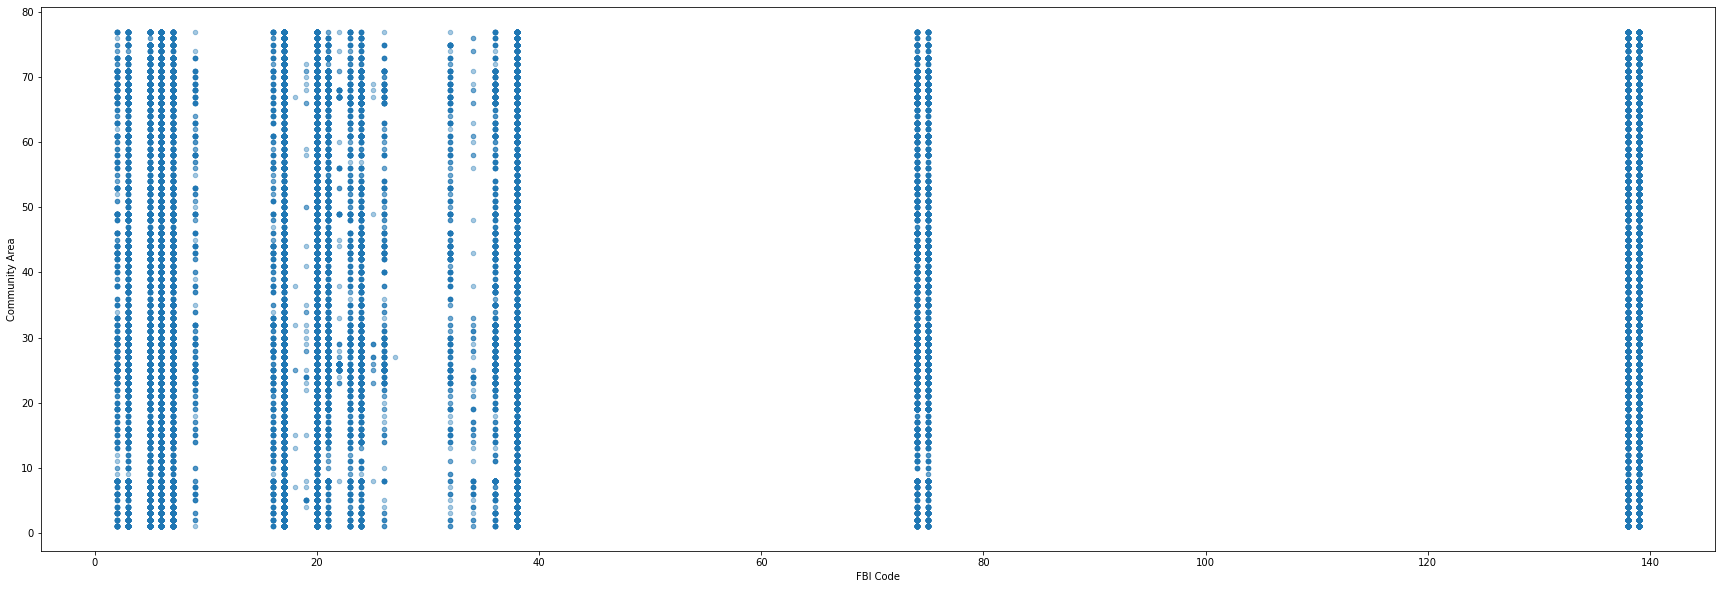

In [84]:
x=np.c_[dt0["FBI Code"]]
y=np.c_[dt0["Community Area"]]
dt0.plot(kind='scatter', x="FBI Code", y='Community Area', alpha=(0.4),figsize=(30,10))
plt.show()

In [85]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [86]:
X_new = [[6]]

In [87]:
print(model.predict(X_new))

[[36.32291787]]


In [88]:
for36=dt0[dt0["Community Area"]==36]
for36

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Y Coordinate,Latitude,Longitude,Location,Season,Weekday,Just_Date,Is_Holiday,Day_of_Month,Month
25,09/06/2020 09:23:00 PM,041XX S LAKE SHORE DR SB,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,PARK PROPERTY,1,0,214,2,...,1877728.0,41.819645,-87.597329,"(41.819644511, -87.597328617)",4,6,2020-09-06,0,6,9
202,09/06/2020 01:30:00 AM,040XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,0,214,2,...,1878648.0,41.822200,-87.602135,"(41.822199933, -87.602134797)",4,6,2020-09-06,0,6,9
452,09/06/2020 07:20:00 PM,035XX S LAKE SHORE DR SB,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,0,0,212,2,...,1881838.0,41.830979,-87.606001,"(41.830978693, -87.606001383)",4,6,2020-09-06,0,6,9
684,09/05/2020 10:15:00 PM,008XX E 43RD ST,0520,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,SIDEWALK,0,0,214,2,...,1876681.0,41.816826,-87.605956,"(41.816826216, -87.605956106)",4,5,2020-09-05,0,5,9
1128,09/05/2020 10:30:00 PM,008XX E 43RD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESTAURANT,0,1,214,2,...,1876681.0,41.816826,-87.605956,"(41.816826216, -87.605956106)",4,5,2020-09-05,0,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140969,01/04/2020 02:30:00 AM,007XX E 38TH PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,212,2,...,1879616.0,41.824902,-87.609347,"(41.824902067, -87.609346517)",1,5,2020-01-04,0,4,1
141754,01/03/2020 02:30:00 AM,041XX S DREXEL BLVD,0460,BATTERY,SIMPLE,APARTMENT,0,0,214,2,...,1877464.0,41.818964,-87.604296,"(41.818964454, -87.604295718)",1,4,2020-01-03,0,3,1
141920,01/03/2020 07:00:00 AM,035XX S COTTAGE GROVE AVE,0560,ASSAULT,SIMPLE,APARTMENT,0,0,212,2,...,1881665.0,41.830531,-87.610277,"(41.830530933, -87.610277459)",1,4,2020-01-03,0,3,1
142513,01/01/2020 02:00:00 AM,008XX E 43RD ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,0,0,214,2,...,1876681.0,41.816826,-87.605956,"(41.816826216, -87.605956106)",1,2,2020-01-01,1,1,1


In [89]:
for36["FBI Code"].value_counts()

6      71
139    65
20     53
138    45
17     28
38     26
21     16
74     15
75     13
5      13
7      12
3      11
32      6
24      6
2       4
36      2
26      1
23      1
Name: FBI Code, dtype: int64

In [90]:
dt0["FBI Code"].value_counts()

6      28603
139    24164
20     17358
138    10735
38      9723
17      8254
5       6378
7       6311
75      5750
21      5558
3       5181
24      4897
74      4278
36      1544
23       958
2        920
16       686
26       533
32       495
9        387
22       222
34       110
19        46
25        19
18         8
27         1
Name: FBI Code, dtype: int64

In [91]:
X_new = [[27]]

In [92]:
print(model.predict(X_new))

[[36.90268942]]


29/10/20 END

In [ ]:
DataFrame["Community Area"].value_counts().plot(kind='bar',figsize=(20,5))

In [ ]:
from sklearn.model_selection import train_test_split
train_frame, test_frame = train_test_split(DataFrame)

In [ ]:
test_frame["Community Area"].value_counts().plot(kind='bar',figsize=(20,5))

In [ ]:
train_frame["Community Area"].value_counts().plot(kind='bar',figsize=(20,5))

In [ ]:
len(train_frame)

In [ ]:
len(test_frame)

Convert "FBI Code" Hexa string to numeric value

In [ ]:
dt1['FBI Code'] = (DataFrame["FBI Code"]).apply(lambda x: int(x, 16))
dt1

In [ ]:
from sklearn import linear_model
from sklearn.utils import shuffle

In [ ]:
dt0=dt0[["Date","Arrest","Domestic","Ward","Community Area","FBI Code"]]
dt0

In [ ]:
dt0.info()

In [ ]:
dt0[(dt0["Date"]=="NaN")]

In [ ]:
predict="FBI Code"
X=np.array(dt0.drop([predict],1))

In [ ]:
type(X)

In [ ]:
Y=np.array(dt0[predict])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.1)

In [ ]:
linear=linear_model.LinearRegression()

In [ ]:
dt0

In [ ]:
def clean_dataset(dt0):
    assert isinstance(dt0, pd.DataFrame), "df needs to be a pd.DataFrame"
    dt0.dropna(inplace=True)
    indices_to_keep = ~dt0.isin([np.nan, np.inf, -np.inf]).any(1)
    return dt0[indices_to_keep].astype(np.float64)

In [ ]:
dt0.dropna()

In [ ]:
linear.fit(x_train, y_train)
acc=linear.score(x_test, y_test)
print(acc)

In [ ]:
dt0[(dt0["Community Area"]=="NaN")]

In [ ]:
corrMatrix= dt1.corr()
corrMatrix["FBI Code"].sort_values(ascending=True)

In [ ]:
corrMatrix= dt0.corr()
corrMatrix["FBI Code"].sort_values(ascending=True)